# Probability: Modified Yahtzee

For reference, I reprinted the problem below.

>There are 10 coins, each blank on one side and numbered on the other side with numbers 1 - 10. All ten coins are tossed and the sum of the numbers landing face up is calculated. What is the probability that this sum is at least 45?

I know that this problem is not <i>exactly</i> Yahtzee, as Yahtzee is played with five identical dice and this game is played with 10 dissimilar coins. However, the concept is similar in that we are tossing things on the table and summing the values that landed face up.

In this game, the coins share half of their possible outcomes, specifically zero or blank, but the other outcomes range from 1 - 10. The probability of the blank/zero side or the numbered side landing face up is 50%, so in that sense it is a fair coin. The numeric value, however, is different for each coin.

## Import Libraries

We will use the <b>SymPy</b> library and its statistics module for our sampling functions. We will also use <b>Itertools</b> library to help generalize the problem a bit in case the reader wants to change the number of dissimilar coins tossed. Lastly, we will use <b>Numpy</b>, <b>Pandas</b>, and <b>Matplotlib</b> libraries for a bit of plotting at the end.

In [1]:
from sympy.stats import *
import itertools as it, pandas as pd, matplotlib.pyplot as plt, numpy as np

## Bernoulli Random Variable

Before we dive into the problem, lets briefly go over the <b>Bernoulli</b> function, which we will use exclusively to toss our coins and create the underlying probability density function.

A Bernoulli process results in only two possible outcomes, sometimes interpreted as "success" or "failure" of an event to take place. The Bernoulli function in SymPy allows us to define those two possible outcomes by passing values through the <b>succ</b> and <b>fail</b> arguments. Typically, the probability defined in the Bernoulli process is the probability associated with a successful outcome. In our case, the probability of both failure and success is 50%. That is, regardless of the numeric value associated with a successful outcome, both the numeric value and zero are equally likely.

Let's create a Bernoulli random variable named ${Y}$ which has a probability of 50% to be either 1 or 0.

In [2]:
Y = Bernoulli('Y',0.50,succ=1,fail=0)

From here, we can get back the probability for each event, in this case either 1 or 0, and we see that both events occur with 50% probability.

In [3]:
density(Y)

BernoulliDistribution(0.5, 1, 0)

There are also functions to calculate the expected value and the variance of ${Y}$

In [4]:
E(Y)

0.500000000000000

In [5]:
variance(Y)

0.250000000000000

Lastly, there are functions that draw a sample from the underlying distribution. Here I draw only one value from our Bernoulli random variable ${Y}$ using the <b>sample</b> function and 10 values using the <b>sample_iter</b> function.

In [6]:
print(sample(Y), list(sample_iter(Y,numsamples=10)))

0 [0, 0, 1, 1, 1, 1, 1, 1, 0, 0]


## Toss the Coins

Getting back to the problem, the question involves assessing the results of flipping 10 coins simultaneously. Since each coin in the problem has a different expected value, due to the different numeric values associated with a successful outcome, we will need to create 10 different Bernoulli random variables.

### Naming Random Variables

To generalize the process of creating more than one Bernoulli random variable, I will use the <b>Itertools</b> library to create a list of numeric values, convert them to strings, and use the strings as the name of the random variable. The benefit of this approach versus explicitly coding 10 different Bernoulli random variables is one may experiment with any number of coins.

In [7]:
num_coins = 10

coin_names = list(''.join(map(str,it.islice(it.count(),num_coins))))

coin_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

### Toss Coins, Sum Results

We will create a Bernoulli random variable for each name in the list <b>coin_names</b>. We will use a counter <b>i</b> to increment the numeric value associated with a successful outcome, starting from 1 and ending on 10.

The for-loop will both create the 10 independent Bernoulli random variables <i>and</i> create a new random variable which is the sum of the 10 independent Bernoulli random variables. Explicitly, the for-loop says if we are at the start of the <b>coin_names</b> list, create a Bernoulli variable named ${"0"}$ and set it to the random variable ${X}$. For each subsequent place in the list <b>coin_names</b> create another Bernoulli random variable and add it to the random variable ${X}$.

When we have reached the end of the list <b>coin_names</b>, no more Bernoulli random variables will be added to the random variable ${X}$.

In [8]:
i = 1

for count, name in enumerate(coin_names):
    if count == 0:
        X = Bernoulli(name,0.50,succ=i,fail=0)
    else:
        X += Bernoulli(name,0.50,succ=i,fail=0)
    i += 1

### Probability Density Function (PDF)

Using the <b>density</b> function, we can print the probability density function of the random variable ${X}$. It will list every possible outcome of flipping the 10 coins and summing the results, as well as the probability associated with each value.

In [9]:
density(X)

{0: 0.000976562500000000,
 1: 0.000976562500000000,
 2: 0.000976562500000000,
 3: 0.00195312500000000,
 4: 0.00195312500000000,
 5: 0.00292968750000000,
 6: 0.00390625000000000,
 7: 0.00488281250000000,
 8: 0.00585937500000000,
 9: 0.00781250000000000,
 10: 0.00976562500000000,
 11: 0.0107421875000000,
 12: 0.0126953125000000,
 13: 0.0146484375000000,
 14: 0.0166015625000000,
 15: 0.0195312500000000,
 16: 0.0214843750000000,
 17: 0.0234375000000000,
 18: 0.0263671875000000,
 19: 0.0283203125000000,
 20: 0.0302734375000000,
 21: 0.0322265625000000,
 22: 0.0341796875000000,
 23: 0.0351562500000000,
 24: 0.0371093750000000,
 25: 0.0380859375000000,
 26: 0.0380859375000000,
 27: 0.0390625000000000,
 28: 0.0390625000000000,
 29: 0.0380859375000000,
 30: 0.0380859375000000,
 31: 0.0371093750000000,
 32: 0.0351562500000000,
 33: 0.0341796875000000,
 34: 0.0322265625000000,
 35: 0.0302734375000000,
 36: 0.0283203125000000,
 37: 0.0263671875000000,
 38: 0.0234375000000000,
 39: 0.02148437500000

We are looking for the probability that the sum is at least 45. That means we want to sum all probabilities from 45 to 55. <b>SymPy</b> makes that very easy to answer using the <b>P</b> function and passing the condition ${X} \geq\ 45$. We see that the probability is about <b>4.2%</b>.

In [10]:
P(X>=45)

0.0419921875000000

### Plotting the PDF

I thought it would be interesting to plot the density function. Let's throw the PDF into a <b>Pandas</b> Series, making sure to change the data time to <b>float</b> from what would otherwise be interpreted as an <b>object</b> data type.

In [11]:
df = pd.Series(density(X), dtype=np.dtype(float))
df.head()

0    0.000977
1    0.000977
2    0.000977
3    0.001953
4    0.001953
dtype: float64

Using <b>Matplotlib</b> we can both plot the PDF and shade in the region of the PDF where probability of ${X} \geq\ 45$. That is, we shade under the curve from ${X} = 45$ to ${X} = 55$.

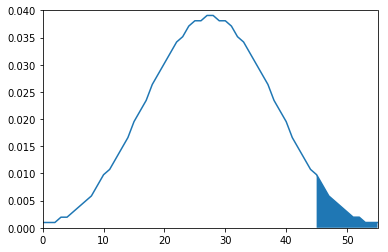

In [12]:
#Create the figure.
plt.figure()

#Plot the density of X.
plt.plot(df)

#Hard-code the x- and y-axis limits.
plt.ylim([0, 0.040])
plt.xlim([0, 55])

#Shade in the region under the PDF of X from X = 45 to X = 55.
x = np.array(df.index).astype(int)[45:56]
y1 = 0
y2 = np.array(df[45:56])

plt.fill_between(x, y1, y2)

#Show the plot.
plt.show()